### Complejidad - Práctico 5 - Percolación
#### Lautaro Giordano

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import sys

sys.setrecursionlimit(500000)

In [2]:
def armar_red(size, p):
    # Armo una grilla size x size donde es 0 (negro) con probabilidad p
    red = np.random.rand(size, size) < 1-p
    return red

1)

(-0.5, 255.5, 255.5, -0.5)

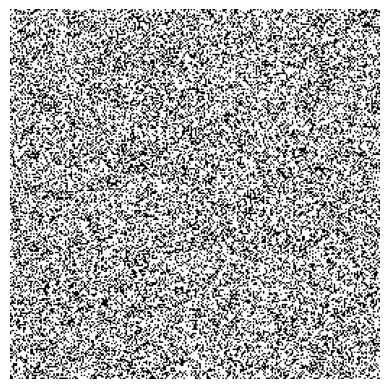

In [3]:
red = armar_red(256, 0.35)

plt.imshow(red, cmap='gray')
plt.axis('off')

2)

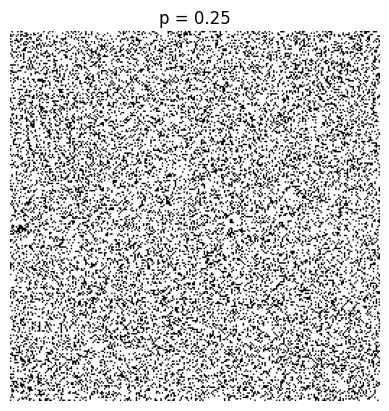

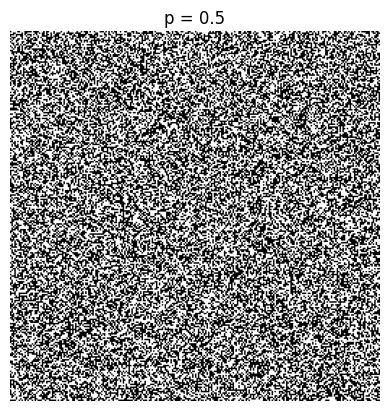

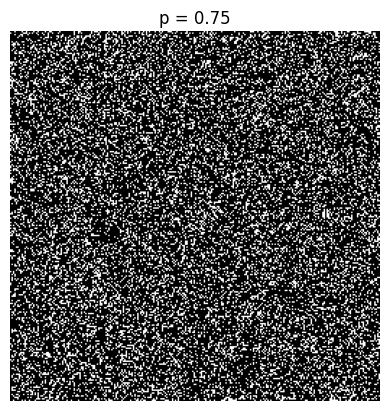

In [33]:
ps = [0.25, 0.5, 0.75]

for p in ps:
    red = armar_red(256, p)
    plt.figure()
    plt.imshow(red, cmap='gray')
    plt.axis('off')
    plt.title(f'p = {p}')

3.

In [3]:
# Funcion para detectar clusters de una red:
def detectar_cluster(red_aux, x, y, cluster):
    if (x < 0 or x > len(red_aux) - 1 or y < 0 or y > len(red_aux[0]) - 1 or red_aux[x][y] == 1):
        return
    
    else:
        cluster.append([x,y])
        red_aux[x][y] = -1
        detectar_cluster(red_aux, x+1, y, cluster)
        detectar_cluster(red_aux, x-1, y, cluster)
        detectar_cluster(red_aux, x, y+1, cluster)
        detectar_cluster(red_aux, x, y-1, cluster)

# Funcion que recorre la red y guarda todos los clusters en una lista
def lista_clusters(red):
    clusters = []
    # Me hago una copia de la red porque voy a borrar los clusters despues de detectarlos
    red_aux = red.copy()
    for x in range(len(red)):
        for y in range(len(red[0])):
            if red_aux[x][y] == 0:
                cluster = []
                detectar_cluster(red_aux, x, y, cluster)
                clusters.append(cluster)

    return clusters

def max_cluster(red):
    clusters = lista_clusters(red)
    maximo = 0
    for cluster in clusters:
        if len(cluster) > maximo:
            maximo = len(cluster)
    return maximo

/tmp/ipykernel_43813/3409929289.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('Paired')


Hay 1952 clusters en la red, el cluster mas grande tiene 14640 elementos


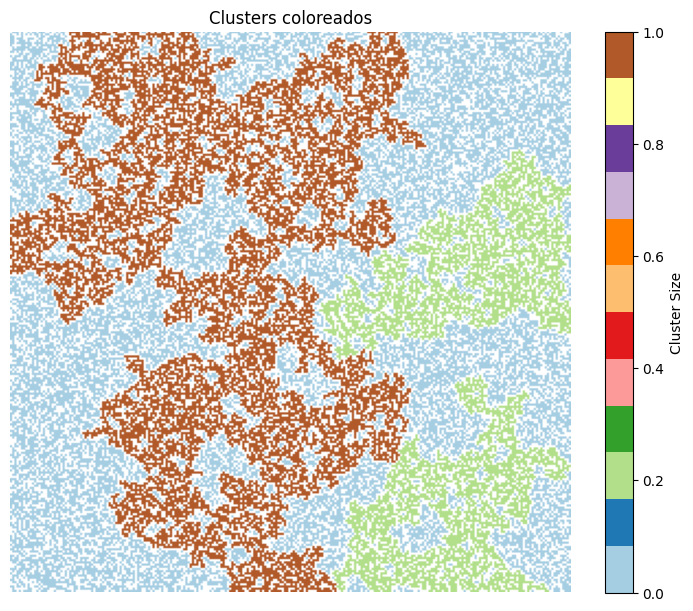

In [92]:
size = 256
p = 0.592

red = armar_red(size, p)
clusters = lista_clusters(red)

# Ploteo la red con los clusters coloreados
fig, ax = plt.subplots(1, 1, figsize=(8, 6), layout='constrained')

# Creo una imagen RGB en blanco (255) y negro (0)
colored_image = np.zeros((size, size, 3))
colored_image[..., :] = np.expand_dims(red, axis=-1) * 255

# Mapa de colores que voy a usar
colormap = cm.get_cmap('Paired')

# Normalizo el mapa de colores con el cluster más chico y más grande
max_size = max(len(cluster) for cluster in clusters)
min_size = min(len(cluster) for cluster in clusters)
normalize = lambda size: (size - min_size) / (max_size - min_size) if max_size > min_size else 0

# Coloreo cada cluster
for cluster in clusters:
    size_normalized = normalize(len(cluster))
    color = colormap(size_normalized)[:3]  # colormap me da un vector [R, G, B, alpha], extraigo los primeros 3 (RGB estan entre 0 y 1 acá)
    for x, y in cluster:
        colored_image[x, y] = np.array(color) * 255  # Convierto a la escala 255

# Muestro el mapa de colores
ax.imshow(colored_image.astype(np.uint8))
ax.axis('off')
ax.set_title("Clusters coloreados")

fig.colorbar(cm.ScalarMappable(norm=None, cmap=colormap), ax=ax, orientation='vertical', label='Cluster Size')

print(f'Hay {len(clusters)} clusters en la red, el cluster mas grande tiene {max(len(cluster) for cluster in clusters)} elementos')

plt.show()

4.

In [49]:
probs = list(np.linspace(0.3, 0.55, 10)) + list(np.linspace(0.56, 0.65, 30)) + list(np.linspace(0.66, .85, 10))

mayor_cluster_mean = []
mayor_cluster_std = []
ocupacion = []
muchos_clusters = {p:[] for p in probs}


size = 256
reps = 10

for i, p in enumerate(probs):
    print(f"Iteracion {i+1}/{len(probs)}", end='\r')
    
    mayor_cluster_aux = []
    ocupacion_aux = []
    
    for rep in range(reps):
        red = armar_red(size, p)
        clusters = lista_clusters(red)
        clusters_sizes = [len(cluster) for cluster in clusters]

        muchos_clusters[p].append(clusters_sizes)
        
        mayor_cluster_aux.append(max(len(cluster) for cluster in clusters))
        # Cuento la cantidad de ocupacion (sitios negros)
        ocupacion_aux.append(size**2 - np.sum(red))

    mayor_cluster_mean.append(np.mean(mayor_cluster_aux)) 
    mayor_cluster_std.append(np.std(mayor_cluster_aux))
    ocupacion.append(np.mean(ocupacion_aux))

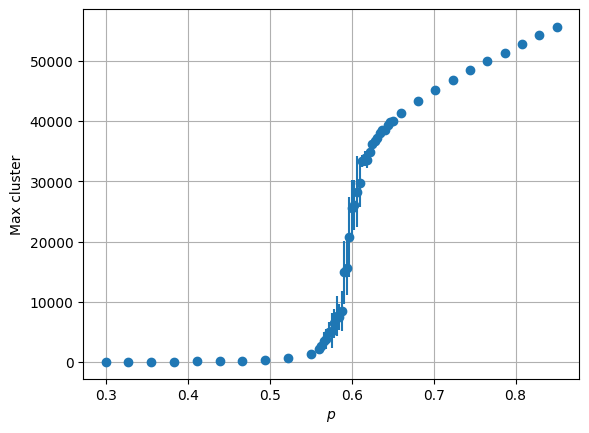

In [50]:
plt.errorbar(probs, mayor_cluster_mean, yerr=mayor_cluster_std, fmt='o')
plt.xlabel(r'$p$')
plt.ylabel('Max cluster')
plt.grid()

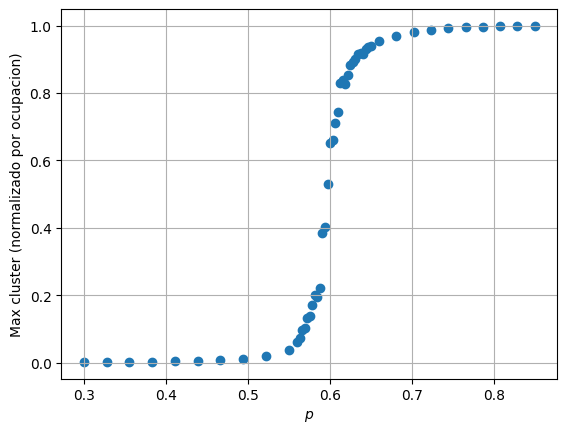

In [55]:
mayor_cluster_norm = [mayor_cluster_mean[i] / ocupacion[i] for i in range(len(mayor_cluster_mean))]

plt.scatter(probs, mayor_cluster_norm, marker='o')
plt.xlabel(r'$p$')
plt.ylabel('Max cluster (normalizado por ocupacion)')
plt.grid()

5.

In [28]:
probs = [0.3, 0.59, 0.7]
reps = 10

clusters_dict = {p:[] for p in probs}
size = 512

for i, p in enumerate(probs):
    print(f"Iteracion {i+1}/{len(probs)}", end='\r')

    for rep in range(reps):
        red = armar_red(size, p)
        clusters = lista_clusters(red)

        cluster_lens = [len(cluster) for cluster in clusters]

        clusters_dict[p].append(cluster_lens)

    # Pongo todos los elementos en una lista (estaban en una lista de listas)
    clusters_dict[p] = [elem for sublist in clusters_dict[p] for elem in sublist]


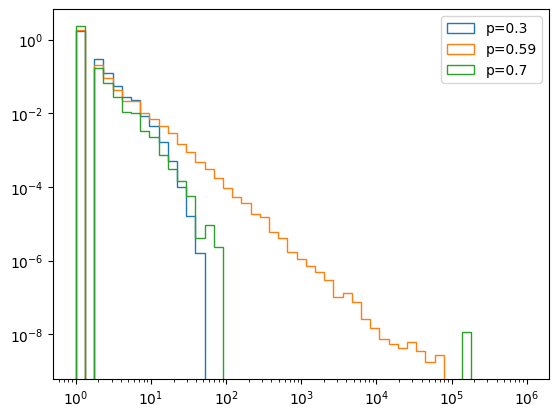

In [31]:
bins = np.logspace(0, 6, 50)

plt.hist(clusters_dict[0.3], bins=bins, density=True, histtype='step', label='p=0.3');
plt.hist(clusters_dict[0.59], bins=bins, density=True, histtype='step', label='p=0.59');
plt.hist(clusters_dict[0.7], bins=bins, density=True, histtype='step', label='p=0.7');
plt.xscale('log')
plt.yscale('log')

plt.legend()

Para calcular el exponente critico mejor voy a usar la distribución acumulada. REVISAR

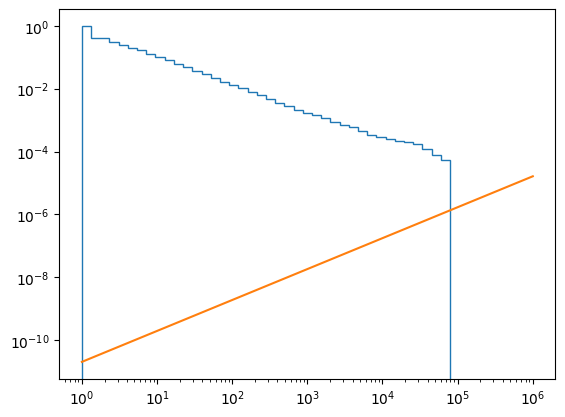

In [50]:
bins = np.logspace(0, 6, 50)
a = plt.hist(clusters_dict[0.59], bins=bins, density=True, histtype='step', label='p=0.3', cumulative=-1);
plt.xscale('log')
plt.yscale('log')

# Fiteo una recta al histograma y calculo el exponente
from scipy.optimize import curve_fit

def f(x, a, b):
    return a * x ** b

popt, pcov = curve_fit(f, bins[:-1], np.histogram(clusters_dict[0.59], bins=bins, density=True)[0], maxfev=10000)
err = np.sqrt(np.diag(pcov))

plt.plot(bins, f(bins, *popt), label=f'Fit: {popt[1]:.2f} +- {err[1]:.2f}')

6.

7.

De memoria: $p_{crit} = 1$ para 1D, ya que cualquier huequito ($p<1$) te divide el cluster más grande en dos.